# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.set_index('Customer', drop=True, inplace=True)
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Instructions

#### 1. Get the numerical variables from our dataset.

In [9]:
numericals = data.select_dtypes(np.number)
numericals.shape

(9134, 8)

#### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

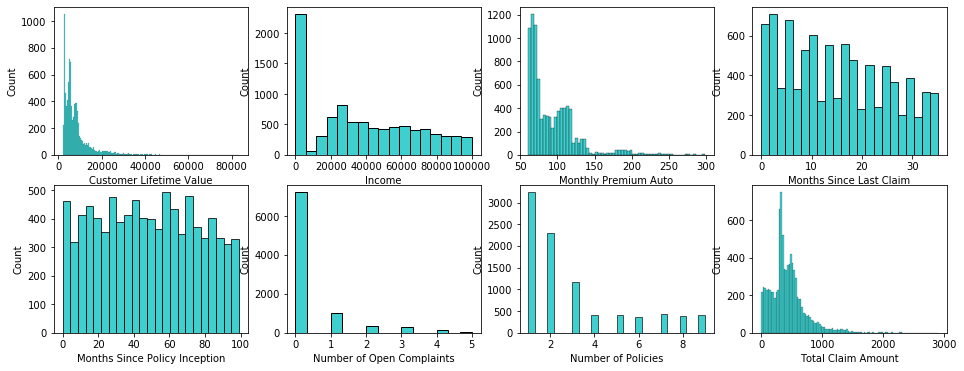

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
count = 0

for col in numericals.columns:
    if count in range(0, 4):
        sns.histplot(numericals[col], ax=ax[0, count], color='c')
    else:
        sns.histplot(numericals[col], ax=ax[1, count - 4], color='c')
    count += 1

plt.show()

##### Types of Distribution:

- **Exponential:** Customer Lifetime Value, Income, Monthly Premium Auto, Number of Open Complaints, Number of Policies
* **Linear:** Months Since Last Claim, Months Since Policy Inception 
- **Normal:** Total Claim Amount

#### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

/tmp/ipykernel_625207/3331263518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[col] = np.log(numericals[col])
/home/sabina/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


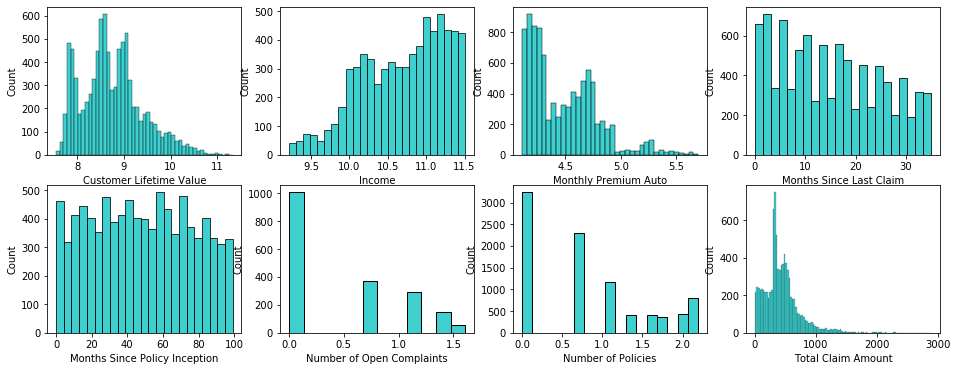

In [17]:
# Change exponential to linear distributions
exponential = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', \
    'Number of Policies']

for col in exponential:
    numericals[col] = np.log(numericals[col])

fig, ax = plt.subplots(2, 4, figsize=(16, 6))
count = 0

for col in numericals.columns:
    if count in range(0, 4):
        sns.histplot(numericals[col], ax=ax[0, count], color='c')
    else:
        sns.histplot(numericals[col], ax=ax[1, count - 4], color='c')
    count += 1

plt.show()

The changes in distributions are:
- **Customer Lifetime Value:** from exponential to normal
* **Income:** from exponential to linear

The Monthly Premium Auto doesn't look like a typical distribution, whereas the Number of Open Complaints & Policies look linear, but are likely to be better left as "exponential" distributions, since they're discrete variables.